# No Reference Metrics

Demonstrates the use of the no-reference metrics: NPS, MTF, and NEQ.

In [1]:
from xdesign import *
import tomopy
import numpy as np
import matplotlib.pylab as plt

`polytope` failed to import `cvxopt.glpk`.
Will use `scipy.optimize.linprog`.


Generate a UnitCircle test phantom. For the MTF, the radius must be less than 0.5, otherwise the circle touches the edges of the field of view.

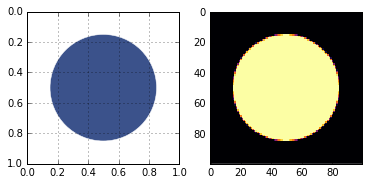

In [2]:
p = UnitCircle(mass_atten=4, radius=0.35)
sidebyside(p, 100)
plt.show()

Generate two sinograms and reconstruct. Noise power spectrum and Noise Equivalent Quanta are meaningless withouth noise so add some poisson noise to the reconstruction process with the `noise` argument. Collecting two sinograms allows us to isolate the noise by subtracting out the circle.

In [3]:
np.random.seed(0)
sinoA = sinogram(100, 100, p, noise=0.1)
sinoB = sinogram(100, 100, p, noise=0.1)
theta = np.arange(0, np.pi, np.pi / 100.)

recA = tomopy.recon(np.expand_dims(sinoA, 1), theta, algorithm='gridrec', center=(sinoA.shape[1]-1)/2.)
recB = tomopy.recon(np.expand_dims(sinoB, 1), theta, algorithm='gridrec', center=(sinoB.shape[1]-1)/2.)

Take a look at the two noisy reconstructions.

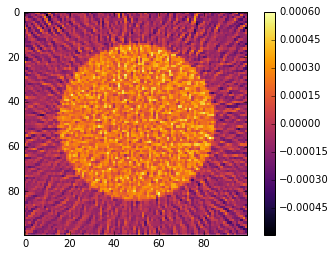

In [4]:
plt.imshow(recA[0], cmap='inferno', interpolation="none")
plt.colorbar()
plt.savefig('UnitCircle_noise0.png', dpi=600,
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.0,
        frameon=False)
plt.show()

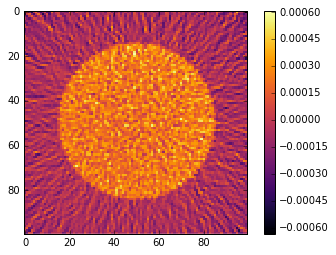

In [5]:
plt.imshow(recB[0], cmap='inferno', interpolation="none")
plt.colorbar()
plt.show()

# Calculate MTF
This metric is meaningful without noise. You can separate the MTF into multiple directions or average them all together using the `Ntheta` argument.

In [6]:
mtf_freq, mtf_value, labels = compute_mtf(p, recA[0], Ntheta=4)

The MTF is really a symmetric function around zero frequency, so usually people just show the positive portion. Sometimes, there is a peak at the higher spatial frequencies instead of the MTF approaching zero. This is probably because of aliasing noise content with frequencies higher than the Nyquist frequency. 

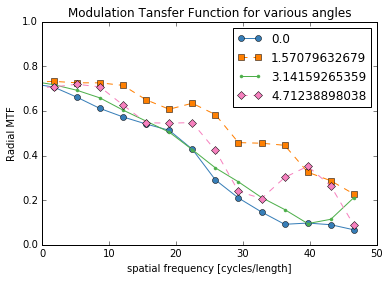

In [7]:
plot_mtf(mtf_freq, mtf_value, labels)
plt.gca().set_xlim([0,50]) # hide negative portion of MTF
plt.show()

You can also use a Siemens Star to calculate the MTF using a fitted sinusoidal method instead of the slanted edges that the above method uses.

In [6]:
s = SiemensStar(n_sectors=32, center=Point(0.5, 0.5), radius=0.5)
d = sidebyside(s, 100)

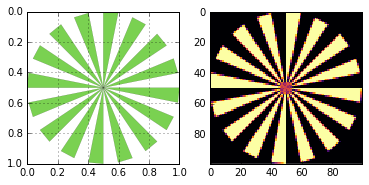

In [7]:
plt.show()

Here we are using the discreet verison of the phantom (without noise), so we are only limited by the resolution of the image.

In [8]:
mtf_freq, mtf_value = compute_mtf_siemens(s, d)

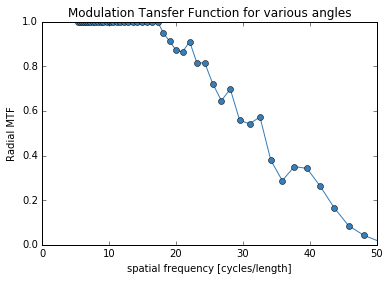

In [13]:
plot_mtf(mtf_freq, mtf_value, labels=None)
plt.gca().set_xlim([0,50]) # hide portion of MTF beyond Nyquist frequency
plt.show()

# Calculate NPS

You can also calculate the radial or 2D frequency plot of the NPS.

In [8]:
X, Y, NPS = compute_nps(p, recA[0], plot_type='frequency',B=recB[0])

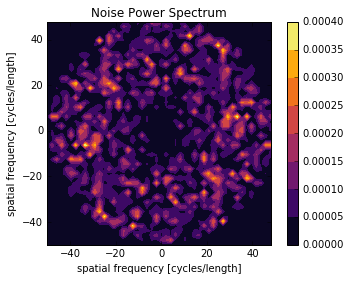

In [9]:
plot_nps(X, Y, NPS)
plt.show()

In [10]:
bins, counts = compute_nps(p, recA[0], plot_type='histogram',B=recB[0])

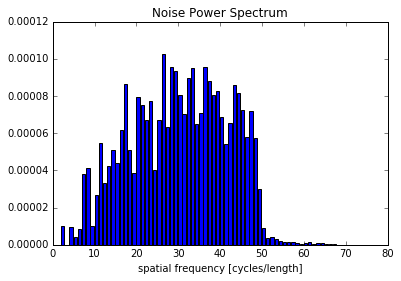

In [14]:
plt.figure()
plt.bar(bins, counts)
plt.xlabel('spatial frequency [cycles/length]')
plt.title('Noise Power Spectrum')
plt.show()

# Calculate NEQ

In [12]:
freq, NEQ = compute_neq(p, recA[0], recB[0])

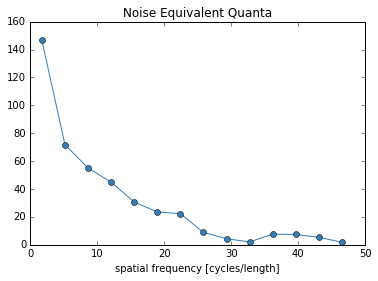

In [13]:
plt.figure()
plt.plot(freq.flatten(), NEQ.flatten())
plt.xlabel('spatial frequency [cycles/length]')
plt.title('Noise Equivalent Quanta')
plt.show()